In [1]:
import pandas as pd
import plotly.plotly as py
import numpy as np
import math
import seaborn as sns

## Old scale

In [2]:
def step_model_rate(income):
    if income < 40000:
        return 0.08
    elif income < 60000:
        return 0.09
    elif income < 80000:
        return 0.10
    elif income < 100000:
        return 0.11
    else:
        return 0.12

def step_model(income):
    # limits
    max_tuition = 12000
    min_tuition = 1500
    min_income = 20000
    roundTo = 100
    # calc tuition
    rate = step_model_rate(income)
    tuition = rate * income
    # apply limits
    if tuition > max_tuition:
        return max_tuition
    if tuition < min_tuition or income <= min_income:
        return min_tuition
    # round
    tuition = round(tuition / roundTo) * roundTo
    return tuition

## Parameters for smooth scale

In [3]:
# primary reference points
max_income = 104000
min_income = 20000
max_tuition = 13500
min_tuition = 1600

# calculate ratios
max_percent = max_tuition / max_income
min_percent = min_tuition / min_income
percents_slope = (max_percent - min_percent) / (max_income - min_income)

In [4]:
max_percent

0.12980769230769232

In [5]:
min_percent

0.08

In [6]:
percents_slope

5.929487179487181e-07

In [7]:
def inc_step_model_rate(income):
    if income < 40000:
        return 0.088
    elif income < 60000:
        return 0.099
    elif income < 80000:
        return 0.11
    elif income < 100000:
        return 0.121
    else:
        return 0.132

def smooth_rate(income):
    min_income = 20000
    min_percent = 0.08
    slope = 5.929487179487181e-07
    
    return (income - min_income) * slope + min_percent

def transitional_model(income):
    # limits
    roundTo=100
    max_tuition = 13500
    min_tuition = 1600
    min_income = 20000
    
    if income <= min_income:
        return min_tuition
    
    rate1 = inc_step_model_rate(income)
    rate2 = smooth_rate(income)
    tuition = income * (rate1 + rate2) / 2
    
    if tuition < min_tuition:
        return min_tuition
    if tuition > max_tuition:
        return max_tuition
    
    tuition = math.ceil(tuition / roundTo) * roundTo
    return tuition

def future_model(income):
    # limits
    roundTo=100
    max_tuition = 13500
    min_tuition = 1600
    min_income = 20000
    
    if income <= min_income:
        return min_tuition
    
    rate =  smooth_rate(income)
    tuition = income * rate
    
    if tuition < min_tuition:
        return min_tuition
    if tuition > max_tuition:
        return max_tuition
    
    tuition = math.ceil(tuition / roundTo) * roundTo
    return tuition

## Adjusted tuitions at a range of income levels

In [8]:
incomes = pd.Series(range(10000, 120001, 5000))
step_tuitions = incomes.map(step_model)
transitional_tuitions = incomes.map(transitional_model)
future_tuitions = incomes.map(future_model)

pd.DataFrame({
    'income': incomes,
    'step': step_tuitions,
    'transition': transitional_tuitions,
    'future': future_tuitions},
    columns = ['income', 'step', 'transition', 'future'])

,income,step,transition,future
0,10000,1500,1600,1600
1,15000,1500,1600,1600
2,20000,1500,1600,1600
3,25000,2000,2200,2100
4,30000,2400,2700,2600
5,35000,2800,3100,3200
6,40000,3600,3900,3700
7,45000,4000,4400,4300
8,50000,4500,5000,4900
9,55000,5000,5500,5600


# Examine details of transitional scale components

In [9]:
incomes = pd.Series(range(10000, 120001, 5000))
pd.DataFrame([
    incomes,
    incomes.map(smooth_rate),
    incomes.map(lambda i: i * smooth_rate(i)),
    incomes.map(inc_step_model_rate),
    incomes.map(lambda i: i * inc_step_model_rate(i))],
    index=['income', 'smooth rate', 'smooth tuition', 'step rate', 'step tuition']).T


,income,smooth rate,smooth tuition,step rate,step tuition
0,10000.0,0.074071,740.705128,0.088,880.0
1,15000.0,0.077035,1155.528846,0.088,1320.0
2,20000.0,0.080000,1600.000000,0.088,1760.0
3,25000.0,0.082965,2074.118590,0.088,2200.0
4,30000.0,0.085929,2577.884615,0.088,2640.0
5,35000.0,0.088894,3111.298077,0.088,3080.0
6,40000.0,0.091859,3674.358974,0.099,3960.0
7,45000.0,0.094824,4267.067308,0.099,4455.0
8,50000.0,0.097788,4889.423077,0.099,4950.0
9,55000.0,0.100753,5541.426282,0.099,5445.0


## Plot the 3 models

In [10]:
# Adjusted Tuitions at a range of income levels
incomes = pd.Series(range(10000, 120001, 100))
step_tuitions = incomes.map(step_model)
transitional_tuitions = incomes.map(transitional_model)
future_tuitions = incomes.map(future_model)
df = pd.DataFrame({
    'income': incomes,
    'step': step_tuitions,
    'transition': transitional_tuitions,
    'future': future_tuitions},
    columns = ['income', 'step', 'transition', 'future'])

In [11]:
# convert to long form
df = df.melt(id_vars=['income'], var_name='model', value_name='tuition')

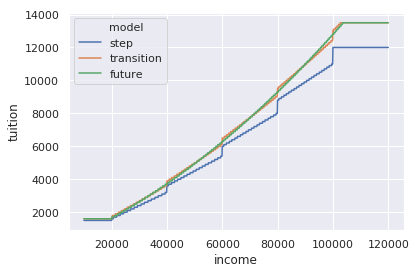

In [12]:
sns.set(style='darkgrid')
sns.lineplot(data=df, x='income', y='tuition', hue='model')